In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("data.csv")
df = df.fillna(0)

6.67 		 6.74
8.88 		 12.21
5.35 		 5.84
7.56 		 7.41


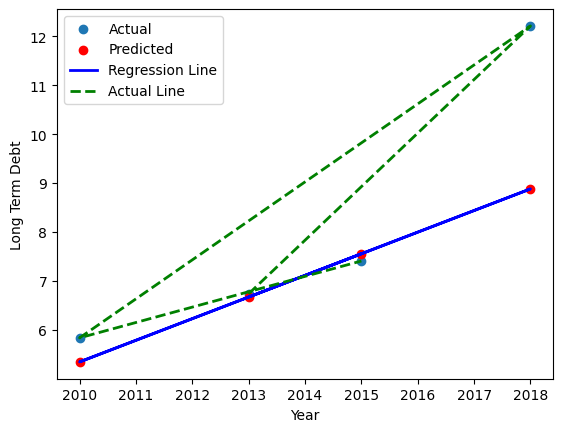

2.8354433989838754

In [ ]:
x = df['year'].values.reshape(-1,1)
y = df['long_term_debt'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x,y)

model = LinearRegression()
model.fit(x_train, y_train)

predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)

for i in range(len(predictions)):
    print(f"{predictions[i][0]:.2f} \t\t {y_test[i][0]:.2f}")

plt.scatter(x_test, y_test, label='Actual')
plt.scatter(x_test, predictions, color='red', label='Predicted')
plt.plot(x_test, model.predict(x_test), color='blue', linewidth=2, label='Regression Line')
plt.plot(x_test, y_test, color='green', linewidth=2, linestyle='dashed', label='Actual Line')
plt.xlabel('Year')
plt.ylabel('Long Term Debt')
plt.legend()
plt.show()
mse

Year 2023: Predicted Long Term Debt: 11.09
Year 2024: Predicted Long Term Debt: 11.53
Year 2025: Predicted Long Term Debt: 11.97
Year 2026: Predicted Long Term Debt: 12.42
Year 2027: Predicted Long Term Debt: 12.86


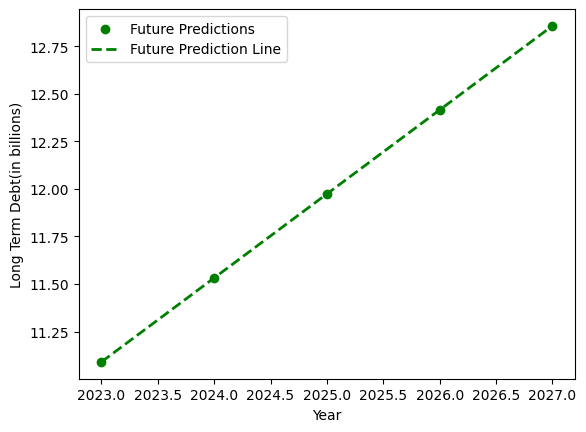

In [ ]:
future_years = np.array([[2023], [2024], [2025], [2026], [2027]])
future_predictions = model.predict(future_years)

plt.scatter(future_years, future_predictions, color='green', marker='o', label='Future Predictions')
plt.plot(future_years, future_predictions, color='green', linestyle='--', linewidth=2, label='Future Prediction Line')

for i in range(len(future_predictions)):
    print(f"Year {future_years[i][0]}: Predicted Long Term Debt: {future_predictions[i][0]:.2f}")
plt.xlabel('Year')
plt.ylabel('Long Term Debt(in billions)')
plt.legend()
plt.show()

In [ ]:
def train_model(x,y):
  x = x.values.reshape(-1,1)
  y = y.replace(',', '', regex=True).astype(float).values.reshape(-1, 1)

  x_train, x_test, y_train, y_test = train_test_split(x,y)

  model = LinearRegression()
  model.fit(x_train, y_train)

  predictions = model.predict(x_test)
  mse = mean_squared_error(y_test, predictions)

  future_years = np.array([[2023], [2024], [2025], [2026], [2027]])
  future_predictions = model.predict(future_years)
  return future_predictions
train_model(df['year'], df['net_sales_snacks'])

array([[4503.82789916],
       [4725.86095238],
       [4947.8940056 ],
       [5169.92705882],
       [5391.96011204]])

In [ ]:
net_sales_snacks = train_model(df['year'], df['net_sales_snacks'])
net_sales_cereal = train_model(df['year'], df['net_sales_cereal'])
net_sales_meals = train_model(df['year'], df['net_sales_meals'])
net_sales_pet = train_model(df['year'], df['net_sales_pet'])
net_sales_dough = train_model(df['year'], df['net_sales_dough'])
net_sales_baking = train_model(df['year'], df['net_sales_baking'])
net_sales_yogurt = train_model(df['year'], df['net_sales_yogurt'])
net_sales_ice_cream = train_model(df['year'], df['net_sales_ice_cream'])


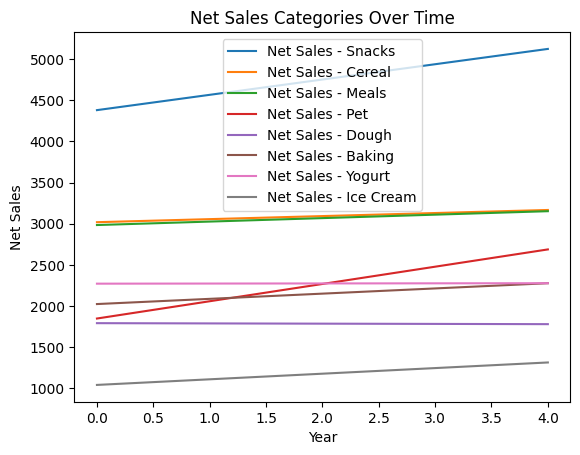

In [ ]:
plt.plot(net_sales_snacks, label='Net Sales - Snacks')
plt.plot(net_sales_cereal, label='Net Sales - Cereal')
plt.plot(net_sales_meals, label='Net Sales - Meals')
plt.plot(net_sales_pet, label='Net Sales - Pet')
plt.plot(net_sales_dough, label='Net Sales - Dough')
plt.plot(net_sales_baking, label='Net Sales - Baking')
plt.plot(net_sales_yogurt, label='Net Sales - Yogurt')
plt.plot(net_sales_ice_cream, label='Net Sales - Ice Cream')

plt.xlabel('Year')
plt.ylabel('Net Sales')
plt.title('Net Sales Categories Over Time')

plt.legend()
plt.show()